## Decode shape binaries

In [1]:
import pandas as pd

def decode_shape_binaries_str(encoded_str, bits=10):
    """
    Decodes a single string of space-separated decimal codes into
    a 2D list (shape) of 0/1 bits. Each code becomes one row in the shape.

    :param encoded_str: A single string with space-separated decimal values
                        (e.g., "1016 64 64 64").
    :param bits: The fixed width of the binary representation (default=10).
    :return: A list of lists, where each sub-list is a row of bits (0's and 1's).
    """
    # Split the string by spaces to get each code as a separate token
    codes = encoded_str.split()

    shape = []
    for code in codes:
        # Convert the code (string) to an integer
        number = int(code)

        # Convert to binary, left-padded with zeros to the desired bit length
        binary_str = format(number, 'b').rjust(bits, '0')

        # Convert the binary string into a list of integer bits (0 or 1)
        row_of_bits = [int(bit) for bit in binary_str]
        shape.append(row_of_bits)

    return shape

# Test with a single participant's game data
# fp = "/Users/sarawu/Desktop/CAB/benchmarking-creativity/creative-foraging-human-data/Games/20120613_122200.txt"
fp = "/Users/ronaldr/Downloads/Creative Foraging Game Data 1.0/Games/20120613_122200.txt"

# Load and name columns
df = pd.read_csv(fp, sep="\t", header=None)
df.columns = ["shape", "timestamp", "timestamp_gallery"] # add column names
print(df.shape)
display(df.head())

# Decode the shape binaries
df['shape_matrix'] = df['shape'].apply(decode_shape_binaries_str) # Create a column that contains the shape matrix, applied to each row
df['shape_matrix_str'] = df['shape'].apply(lambda x: "\n".join(["".join(map(str, row)) for row in decode_shape_binaries_str(x)]))


(280, 3)


,shape,timestamp,timestamp_gallery
0,1023,15.712,
1,1023,16.927,31.45
2,512 1022,72.191,
3,512 1020 4,74.190,
4,256 1020 4,83.084,


In [2]:
# Example shape matrices
tab1 = pd.DataFrame(df.iloc[2]['shape_matrix'])
tab2 = pd.DataFrame(df.iloc[3]['shape_matrix'])
print(tab1, '\n')
print(tab2, '\n')
print((tab1 + tab2).fillna(0).astype(int))


   0  1  2  3  4  5  6  7  8  9
0  1  0  0  0  0  0  0  0  0  0
1  1  1  1  1  1  1  1  1  1  0 

   0  1  2  3  4  5  6  7  8  9
0  1  0  0  0  0  0  0  0  0  0
1  1  1  1  1  1  1  1  1  0  0
2  0  0  0  0  0  0  0  1  0  0 

   0  1  2  3  4  5  6  7  8  9
0  2  0  0  0  0  0  0  0  0  0
1  2  2  2  2  2  2  2  2  1  0
2  0  0  0  0  0  0  0  0  0  0


--------------------------------
1023 



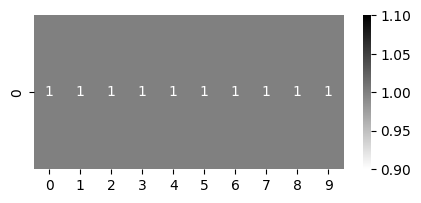



--------------------------------
1023 



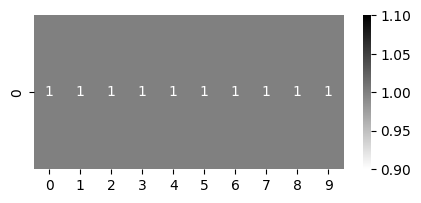



--------------------------------
512 1022 



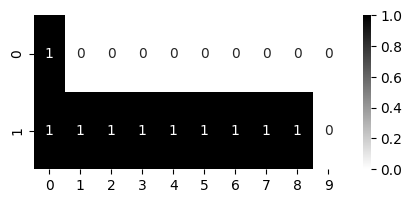



--------------------------------
512 1020 4 



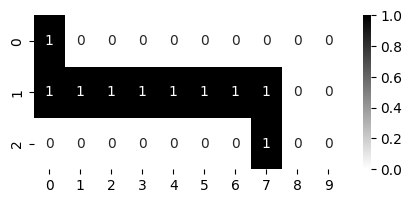



--------------------------------
256 1020 4 



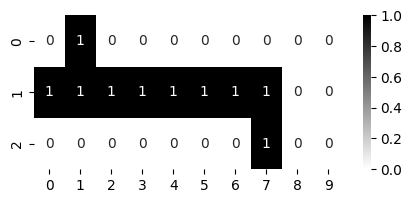



--------------------------------
256 1020 8 



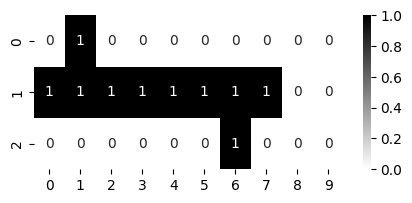



--------------------------------
512 1016 528 



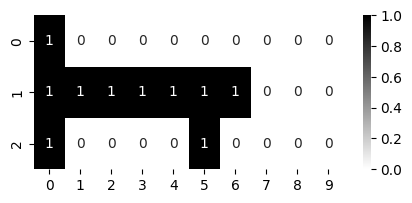



--------------------------------
528 1008 528 



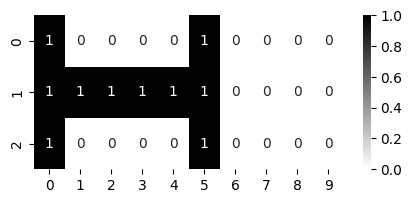



--------------------------------
528 1016 512 



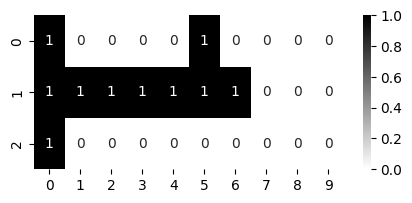



--------------------------------
528 1008 528 



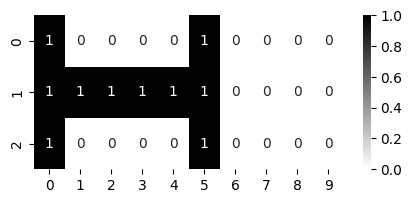



--------------------------------
528 1008 272 



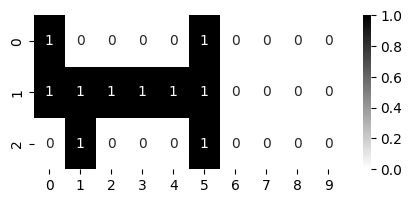



--------------------------------
528 1008 288 



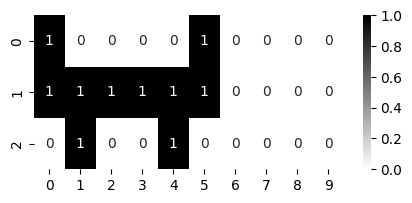

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# This visualizes the first N shapes in the dataset
for idx, row in df.iterrows():
    print("--------------------------------")
    print(row['shape'], '\n')
    # print(row['shape_matrix_str'])
    fig, ax = plt.subplots(figsize=(5, 2))
    sns.heatmap(row['shape_matrix'], annot=True, fmt="d", cmap="binary", ax=ax)
    plt.show()
    print("\n")
    if idx > 10:
        break


## Load all data

In [4]:
# Iterate through all the participants in the dataset
import os

df_list = []
for participant_file in os.listdir("creative-foraging-human-data/Games"):
    # print(participant_file)
    with open("creative-foraging-human-data/Games/"+participant_file, 'r') as f:
        df = pd.read_csv(f, sep="\t", header=None)
        df.columns = ["shape", "timestamp", "timestamp_gallery"]
        df['game_file'] = participant_file
        df['shape_matrix'] = df['shape'].apply(decode_shape_binaries_str)
        df['shape_matrix_str'] = df['shape'].apply(lambda x: "\n".join(["".join(map(str, row)) for row in decode_shape_binaries_str(x)]))
        df_list.append(df)

df = pd.concat(df_list)
print(df.shape)
display(df.head())

# Save the processed data
df.to_csv("data/all-games.tsv", index=False, sep="\t", quoting=2)


(32319, 6)


,shape,timestamp,timestamp_gallery,game_file,shape_matrix,shape_matrix_str
0,1023,16.038,,20120513_091629.txt,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
1,1023,17.168,29.650000000000002,20120513_091629.txt,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
2,2 1022,76.165,,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 1, 1, ...",0000000010\n1111111110
3,4 1020 512,79.600,,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, ...",0000000100\n1111111100\n1000000000
4,4 1020 256,81.315,,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, ...",0000000100\n1111111100\n0100000000


In [5]:
df = pd.read_csv("data/all-games.tsv", sep="\t")
df

,shape,timestamp,timestamp_gallery,game_file,shape_matrix,shape_matrix_str
0,1023,16.038,,20120513_091629.txt,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
1,1023,17.168,29.650000000000002,20120513_091629.txt,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]",1111111111
2,2 1022,76.165,,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 1, 1, 1, ...",0000000010\n1111111110
3,4 1020 512,79.600,,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, ...",0000000100\n1111111100\n1000000000
4,4 1020 256,81.315,,20120513_091629.txt,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 1, 1, 1, ...",0000000100\n1111111100\n0100000000
...,...,...,...,...,...,...
32314,896 320 448 256 256,953.421,,20120611_131956.txt,"[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, ...",1110000000\n0101000000\n0111000000\n0100000000...
32315,960 128 224 128 128,954.556,,20120611_131956.txt,"[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, ...",1111000000\n0010000000\n0011100000\n0010000000...
32316,960 640 192 128 128,955.716,,20120611_131956.txt,"[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, ...",1111000000\n1010000000\n0011000000\n0010000000...
32317,960 640 640 128 128,956.739,,20120611_131956.txt,"[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, ...",1111000000\n1010000000\n1010000000\n0010000000...


<Axes: >

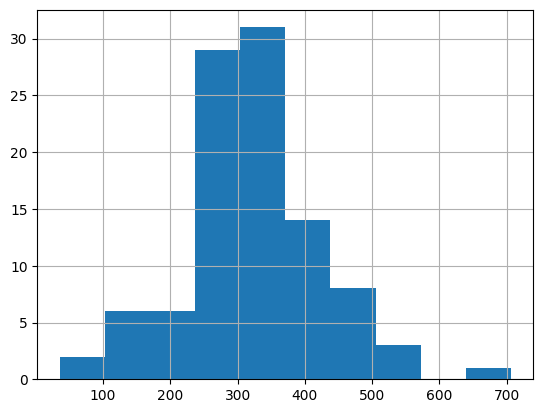

In [6]:
df.groupby("game_file").size().sort_values(ascending=False).hist()

In [7]:


# Create a thresholding algorithm that tags exploitaion and exploration phases
# exploitation is when players' time intervals between consecutive choices to the gallery are decreasing
# exploration phases is when players' time intervals between consecutive choices to the gallery are increasing

def identify_exploitation_phases(time_intervals):
    exploitation_phases = []
    current_phase = []

    for i in range(1, len(time_intervals)):
        if time_intervals[i] < time_intervals[i - 1]:
            if not current_phase:
                current_phase.append(time_intervals[i - 1])
            current_phase.append(time_intervals[i])
        else:
            if current_phase:
                exploitation_phases.append(current_phase)
                current_phase = []

    if current_phase:
        exploitation_phases.append(current_phase)

    return exploitation_phases

def merge_exploitation_phases(exploitation_phases):
    merged_phases = []
    i = 0

    while i < len(exploitation_phases):
        current_phase = exploitation_phases[i]
        while i + 1 < len(exploitation_phases) and max(current_phase) > max(exploitation_phases[i + 1]):
            current_phase.extend(exploitation_phases[i + 1])
            i += 1
        merged_phases.append(current_phase)
        i += 1

    return merged_phases

def tag_phases(time_intervals):
    exploitation_phases = identify_exploitation_phases(time_intervals)
    merged_phases = merge_exploitation_phases(exploitation_phases)

    phase_labels = ['exploration'] * len(time_intervals)
    for phase in merged_phases:
        start_idx = time_intervals.index(phase[0])
        end_idx = start_idx + len(phase)
        for i in range(start_idx, end_idx):
            phase_labels[i] = 'exploitation'

    return phase_labels

# Example usage
time_intervals_A = [10, 20, 70, 30, 20, 40, 90, 40, 10]
time_intervals_B = [10, 20, 70, 30, 20, 50, 40, 10]

phases_A = tag_phases(time_intervals_A)
phases_B = tag_phases(time_intervals_B)

print("Phases for A:", phases_A)
print("Phases for B:", phases_B)

Phases for A: ['exploration', 'exploration', 'exploitation', 'exploitation', 'exploitation', 'exploration', 'exploitation', 'exploitation', 'exploitation']
Phases for B: ['exploration', 'exploration', 'exploitation', 'exploitation', 'exploitation', 'exploitation', 'exploitation', 'exploitation']
